In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df.drop(['Name', 'Siblings/Spouses Aboard' , 'Parents/Children Aboard' , 'Fare'] , inplace = True , axis = 1)

In [10]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [11]:
df.drop(['Age' , 'Pclass'] , inplace = True  , axis = 1)

In [12]:
df.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [13]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

In [14]:
df.head()

,Survived,Sex
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [18]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
lg = LogisticRegression()
lg.fit(x_train , y_train)
pred = lg.predict(x_test)

Text(0.5, 0, 'False Positive Rate')

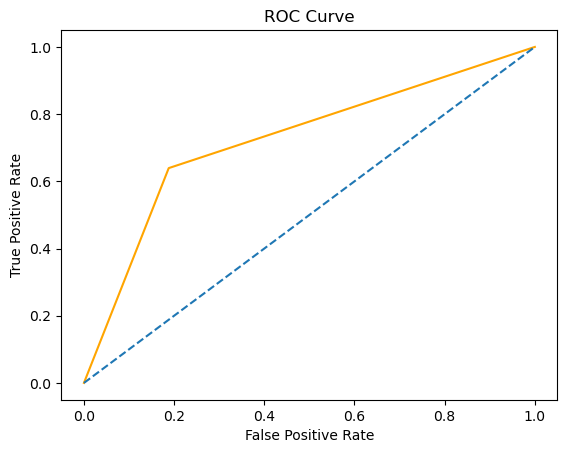

In [40]:
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr , tpr , c = 'orange')
plt.plot([0,1] , [0,1] , linestyle='--')
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")


In [41]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       117
           1       0.64      0.64      0.64        61

    accuracy                           0.75       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.75      0.75      0.75       178



<Axes: >

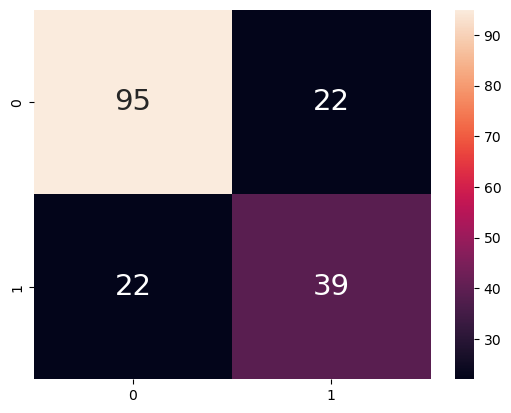

In [46]:
cm = confusion_matrix(y_test , pred)
data = pd.DataFrame(cm,range(2) , range(2))
sb.heatmap(cm , annot = True , annot_kws = {'size':21})